# Clonamos el repositorio para obtener los dataSet

In [1]:
!git clone https://github.com/joanby/machinelearning-az.git

Cloning into 'machinelearning-az'...
remote: Enumerating objects: 10497, done.
remote: Total 10497 (delta 0), reused 0 (delta 0), pack-reused 10497
Receiving objects: 100% (10497/10497), 310.48 MiB | 35.25 MiB/s, done.
Resolving deltas: 100% (213/213), done.
Checking out files: 100% (10250/10250), done.


# Damos acceso a nuestro Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Test it

In [ ]:
!ls '/content/drive/My Drive' 

# Google colab tools

In [2]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

# Instalar dependendias

In [ ]:
!pip install sklearn

# Clustering Jerárquico

# Cómo importar las librerías


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importar el data set


In [4]:
dataset = pd.read_csv('/content/machinelearning-az/datasets/Part 4 - Clustering/Section 25 - Hierarchical Clustering/Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

# Utilizar el dendrograma para encontrar el número óptimo de clusters

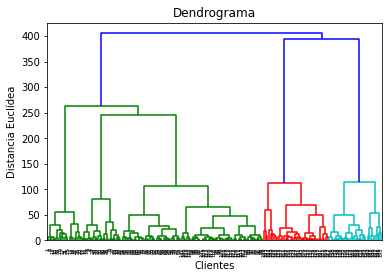

In [9]:
#A diferencia de k-means que utilizamos el método del codo, para el cluster jerarquico utilizamos los dendrogramas.
import scipy.cluster.hierarchy as sch
#Método ward -> minizar las varianzas entre los puntos de los cluster
dendrogram = sch.dendrogram(sch.linkage(X, method = "ward"))
plt.title("Dendrograma")
plt.xlabel("Clientes")
plt.ylabel("Distancia Euclídea")
plt.show()

# Ajustar el clustetring jerárquico a nuestro conjunto de datos

In [10]:
from sklearn.cluster import AgglomerativeClustering
#affinity = distancia de los puntos
hc = AgglomerativeClustering(n_clusters = 5, affinity = "euclidean", linkage = "ward")
y_hc = hc.fit_predict(X)
print(y_hc)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


# Visualización de los clusters

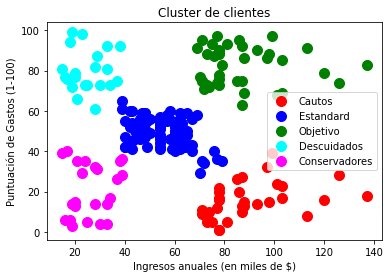

In [8]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = "red", label = "Cautos")
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = "blue", label = "Estandard")
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = "green", label = "Objetivo")
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = "cyan", label = "Descuidados")
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = "magenta", label = "Conservadores")
plt.title("Cluster de clientes")
plt.xlabel("Ingresos anuales (en miles de $)")
plt.ylabel("Puntuación de Gastos (1-100)")
plt.legend()
plt.show()